In [68]:
#ProstateX final 

#Andrii Trokoz



'''
Importing all the necessary libraries and frameworks in order to start image processing 
'''
import sys
import SimpleITK as sitk
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import os
import fnmatch
import shutil
from ipywidgets import interact, fixed
import pandas as pd
import warnings
from skimage import exposure

def myshow(image_arr,slice_n):
    plt.imshow(image_arr[slice_n,:,:],cmap='gray')
    plt.show()

In [2]:
#reading .csv in order to get all of necessary coordinates for cropping 
data_image = pd.read_csv('C://Image Processing/ProstateX-TestLesionInformation/ProstateX-TrainingLesionInformationv2/ProstateX-Images-Train.csv')

ktrans_df = pd.read_csv('C://Image Processing/ProstateX-TestLesionInformation/ProstateX-TrainingLesionInformationv2/ProstateX-Images-KTrans-Train.csv')

In [3]:
#Extracting the names of each image for the further processing from Data Frame, we need this to match names of files with pos coordinates
data_image.loc[:,'match'] = '' #creates new column where we`ll put the matching names 

for i in range(len(data_image)):  #names for further matching with images` names
    data_image.loc[i,'match'] = data_image.loc[i,'DCMSerDescr'] + '_' + data_image.loc[i,'ProxID'].replace('-','_') + '.nii.gz'

    
    
#ktrans match
ktrans_df.loc[:,'match'] = '' #creates new column with matching names for ktrans
data_dir=os.listdir('C://Image Processing/ProstateX/resampled/')
for i in range(len(ktrans_df)):
    ktrans_df.loc[i,'match'] = str(ktrans_df.loc[i,'ProxID'])+'-Ktrans.mhd'
    if ktrans_df.loc[i,'match'] in data_dir: 
        print('{} matched!'.format(ktrans_df.loc[i,'match']))



ProstateX-0000-Ktrans.mhd matched!
ProstateX-0001-Ktrans.mhd matched!
ProstateX-0002-Ktrans.mhd matched!
ProstateX-0002-Ktrans.mhd matched!
ProstateX-0003-Ktrans.mhd matched!
ProstateX-0003-Ktrans.mhd matched!
ProstateX-0004-Ktrans.mhd matched!
ProstateX-0005-Ktrans.mhd matched!
ProstateX-0005-Ktrans.mhd matched!
ProstateX-0005-Ktrans.mhd matched!
ProstateX-0006-Ktrans.mhd matched!
ProstateX-0006-Ktrans.mhd matched!
ProstateX-0007-Ktrans.mhd matched!
ProstateX-0008-Ktrans.mhd matched!
ProstateX-0009-Ktrans.mhd matched!
ProstateX-0010-Ktrans.mhd matched!
ProstateX-0011-Ktrans.mhd matched!
ProstateX-0012-Ktrans.mhd matched!
ProstateX-0012-Ktrans.mhd matched!
ProstateX-0013-Ktrans.mhd matched!
ProstateX-0014-Ktrans.mhd matched!
ProstateX-0015-Ktrans.mhd matched!
ProstateX-0016-Ktrans.mhd matched!
ProstateX-0017-Ktrans.mhd matched!
ProstateX-0018-Ktrans.mhd matched!
ProstateX-0019-Ktrans.mhd matched!
ProstateX-0020-Ktrans.mhd matched!
ProstateX-0021-Ktrans.mhd matched!
ProstateX-0021-Ktran

ProstateX-0171-Ktrans.mhd matched!
ProstateX-0171-Ktrans.mhd matched!
ProstateX-0171-Ktrans.mhd matched!
ProstateX-0172-Ktrans.mhd matched!
ProstateX-0172-Ktrans.mhd matched!
ProstateX-0172-Ktrans.mhd matched!
ProstateX-0173-Ktrans.mhd matched!
ProstateX-0173-Ktrans.mhd matched!
ProstateX-0174-Ktrans.mhd matched!
ProstateX-0175-Ktrans.mhd matched!
ProstateX-0175-Ktrans.mhd matched!
ProstateX-0176-Ktrans.mhd matched!
ProstateX-0176-Ktrans.mhd matched!
ProstateX-0177-Ktrans.mhd matched!
ProstateX-0177-Ktrans.mhd matched!
ProstateX-0177-Ktrans.mhd matched!
ProstateX-0178-Ktrans.mhd matched!
ProstateX-0179-Ktrans.mhd matched!
ProstateX-0179-Ktrans.mhd matched!
ProstateX-0180-Ktrans.mhd matched!
ProstateX-0181-Ktrans.mhd matched!
ProstateX-0182-Ktrans.mhd matched!
ProstateX-0183-Ktrans.mhd matched!
ProstateX-0184-Ktrans.mhd matched!
ProstateX-0184-Ktrans.mhd matched!
ProstateX-0185-Ktrans.mhd matched!
ProstateX-0186-Ktrans.mhd matched!
ProstateX-0186-Ktrans.mhd matched!
ProstateX-0187-Ktran

In [4]:
'''
Creating separate DataFrames for each of modalites. 

It is going to be: t2_df, adc_df, bval_df and ktrans_df

'''
#creating lists for further processing, renaming and removing the duplicates in the directory  
data_dir=os.listdir('C://Image Processing/ProstateX/resampled/')

def make_match_list(directory, matching_value): 
    #generating a list of matching names
    match=[i for i in directory if matching_value in i]
    for i in range(len(match)): 
        if match[i].split('_')[-1][0] !='0':
            match[i]=match[i][:-12] + '.nii.gz'
    
    match_list=[]
    for i in match: 
        if i not in match_list:
            match_list.append(i)
            
    return match_list

#macth lists
t2_list = make_match_list(data_dir,'t2')

adc_list = make_match_list(data_dir,'ADC')

bval_list = make_match_list(data_dir, 'BVAL')


#matching dataframes

#Creating a DataFrame with names of files 
#we already have dataframe for the ktrans, because we did not have any issues with names of files
t2_df = data_image[data_image['match'].isin(t2_list)].copy() #use .copy() to overcome SettingWithCopyWarning issue
t2_df.index = range(len(t2_df))

adc_df = data_image[data_image['match'].isin(adc_list)].copy()
adc_df.index = range(len(adc_df))

bval_df = data_image[data_image['match'].isin(bval_list)].copy()
bval_df.index = range(len(bval_df))

In [5]:
#to match all of the files with pos coordinates, we have to assign names to all of our 'match' names
#here we are defining a function to assign names to instances that have different DCMSerNum, but the same name 
#these names are the same as in our files` directory
#function design specifically for this project, cause names of columns in the dataframes and indexing are only suitable for 
#ProstateX data
def rename_missed_match(data):
   #data=corresponding dataframe
    try:
        for i in range(len(data)):
        
            if data.loc[i,'match']==data.loc[i+1,'match'] and data.loc[i,'DCMSerNum'] != data.loc[i+1,'DCMSerNum']:
            
                if len(str(data.loc[i,'DCMSerNum'])) == 1:
                    if len(str(data.loc[i+1,'DCMSerNum'])) != 2:
                        data.loc[i,'match'] = data.loc[i,'match'].strip('.nii.gz')+'_s00'+str(data.loc[i,'DCMSerNum'])+'.nii.gz'
                        data.loc[i+1,'match'] = data.loc[i+1,'match'].strip('.nii.gz')+'_s00'+str(data.loc[i+1,'DCMSerNum'])+'.nii.gz'
                    else: 
                        data.loc[i,'match'] = data.loc[i,'match'].strip('.nii.gz')+'_s00'+str(data.loc[i,'DCMSerNum'])+'.nii.gz'
                        data.loc[i+1,'match'] = data.loc[i+1,'match'].strip('.nii.gz')+'_s0'+str(data.loc[i+1,'DCMSerNum'])+'.nii.gz'
            
                elif len(str(data.loc[i,'DCMSerNum'])) == 2:
                    if len(str(data.loc[i+1,'DCMSerNum'])) != 2:
                        data.loc[i,'match'] = data.loc[i,'match'].strip('.nii.gz')+'_s0'+str(data.loc[i,'DCMSerNum'])+'.nii.gz'
                        data.loc[i+1,'match'] = data.loc[i+1,'match'].strip('.nii.gz')+'_s00'+str(data.loc[i+1,'DCMSerNum'])+'.nii.gz'
                    else:
                        data.loc[i,'match'] = data.loc[i,'match'].strip('.nii.gz')+'_s0'+str(data.loc[i,'DCMSerNum'])+'.nii.gz'
                        data.loc[i+1,'match'] = data.loc[i,'match'].strip('.nii.gz')+'_s0'+str(data.loc[i,'DCMSerNum'])+'.nii.gz'
    except: KeyError


rename_missed_match(t2_df)  #applying functions
rename_missed_match(adc_df)
rename_missed_match(bval_df)

#we do not have issues with files that possesses different DCMSerNum in ktrans dataframe. SO we do not need do this step for the ktrans


In [9]:
#creating index column for patch extraction and transforming physical points to indexes


folder='C://Image Processing/ProstateX/resampled/'
data_dir=os.listdir('C://Image Processing/ProstateX/resampled/')

def physical_to_index(data, directory,folder):
#function transforms physical points to indexes, checking for missing values(which are duplicates)
    data.loc[:,'coordinates'] = '' #creating new column for the coordinates
    for i in range(len(data)):
        for image in directory:
            if data.loc[i,'match'] == image:
                try:
                    pos=[float(i) for i in data.loc[i,'pos'].split(' ')] 
                except: 
                    if ValueError: #error due to length of dataframe, doesn`t affect anything
                        data.loc[i, 'pos'] = data.loc[i, 'pos'].strip(' ')
                        pos=[float(i) for i in data.loc[i,'pos'].split(' ')]
                im=sitk.ReadImage(folder+image)
                ind=im.TransformPhysicalPointToIndex(pos)
                data.at[i,'coordinates']=ind
                print(pos, '\tare coordinates for\t'+data.loc[i,'match']+'\ttransformed to\t'+str(data.loc[i,'coordinates']))
    for i in range(len(data)): #checking and deleting empty values, which are duplicates
        if data.loc[i,'coordinates']=='':
            print(str(data.loc[i,'match'])+'\n is duplicate! Deleting...')
            
            data.drop(data.index[i]) #dropping duplicates

            
            
            
physical_to_index(t2_df,data_dir,folder)
physical_to_index(adc_df,data_dir,folder)
physical_to_index(bval_df,data_dir,folder)
physical_to_index(ktrans_df,data_dir,folder)


[25.7457, 31.8707, -38.511] 	are coordinates for	t2_tse_tra_ProstateX_0000.nii.gz	transformed to	(167, 159, 8)
[-40.5367071921656, 29.320722668457, -16.7076690704346] 	are coordinates for	t2_tse_tra_ProstateX_0001_s006.nii.gz	transformed to	(157, 197, 9)
[-40.5367071921656, 29.320722668457, -16.7076690704346] 	are coordinates for	t2_tse_tra_ProstateX_0001_s010.nii.gz	transformed to	(157, 197, 9)
[-2.058, 38.6752, -34.6104] 	are coordinates for	t2_tse_tra_ProstateX_0002.nii.gz	transformed to	(203, 168, 9)
[-27.0102, 41.5467, -26.0469] 	are coordinates for	t2_tse_tra_ProstateX_0002.nii.gz	transformed to	(153, 166, 12)
[22.1495, 31.2717, -2.45933] 	are coordinates for	t2_tse_tra_ProstateX_0003.nii.gz	transformed to	(240, 178, 12)
[-21.2871, 19.3995, 19.7429] 	are coordinates for	t2_tse_tra_ProstateX_0003.nii.gz	transformed to	(153, 222, 16)
[-7.69665, 3.64226, 23.1659] 	are coordinates for	t2_tse_tra_ProstateX_0004.nii.gz	transformed to	(220, 216, 10)
[-22.0892639160156, 25.4668045043945,

[-11.24582, 60.9975, -48.0648] 	are coordinates for	t2_tse_tra_ProstateX_0041.nii.gz	transformed to	(150, 149, 6)
[0.258727, 12.1867, 29.2257] 	are coordinates for	t2_tse_tra_ProstateX_0042_s004.nii.gz	transformed to	(210, 210, 6)
[0.258727, 12.1867, 29.2257] 	are coordinates for	t2_tse_tra_ProstateX_0042_s009.nii.gz	transformed to	(210, 210, 6)
[8.92826, 59.9957, -1.69448] 	are coordinates for	t2_tse_tra_ProstateX_0043.nii.gz	transformed to	(163, 159, 16)
[-5.795073, 18.7907, 87.5082] 	are coordinates for	t2_tse_tra_ProstateX_0044.nii.gz	transformed to	(197, 204, 5)
[-4.47705, 12.5405, 17.9921] 	are coordinates for	t2_tse_tra_ProstateX_0045.nii.gz	transformed to	(216, 225, 12)
[-32.861, -2.20032, 46.9729] 	are coordinates for	t2_tse_tra_ProstateX_0046.nii.gz	transformed to	(139, 184, 11)
[-4.84385, 2.95186, 35.0858] 	are coordinates for	t2_tse_tra_ProstateX_0046.nii.gz	transformed to	(195, 171, 7)
[-24.2868, 62.7355, -24.2213] 	are coordinates for	t2_tse_tra_ProstateX_0047.nii.gz	tran

[29.4178, 43.3347, -62.3276] 	are coordinates for	t2_tse_tra_ProstateX_0093.nii.gz	transformed to	(193, 155, 14)
[9.6081, 31.5817, -68.8806] 	are coordinates for	t2_tse_tra_ProstateX_0093.nii.gz	transformed to	(154, 177, 11)
[30.4332, 39.6444, -98.2314] 	are coordinates for	t2_tse_tra_ProstateX_0093.nii.gz	transformed to	(199, 155, 2)
[31.5813, 15.6722, -42.8497] 	are coordinates for	t2_tse_tra_ProstateX_0094.nii.gz	transformed to	(189, 229, 8)
[-29.8824, 33.0609, 17.1315] 	are coordinates for	t2_tse_tra_ProstateX_0095_s004.nii.gz	transformed to	(170, 169, 10)
[-28.6965, 9.10563, 11.1672] 	are coordinates for	t2_tse_tra_ProstateX_0095_s006.nii.gz	transformed to	(173, 215, 7)
[14.1124, 22.6493, 22.4049] 	are coordinates for	t2_tse_tra_ProstateX_0096.nii.gz	transformed to	(162, 199, 7)
[-21.7875, 18.8555, 24.8761] 	are coordinates for	t2_tse_tra_ProstateX_0097_s009.nii.gz	transformed to	(170, 203, 11)
[-21.7875, 18.8555, 24.8761] 	are coordinates for	t2_tse_tra_ProstateX_0097_s005.nii.gz

[-2.44585, 41.3319, 33.2478] 	are coordinates for	t2_tse_tra_ProstateX_0132_s009.nii.gz	transformed to	(214, 170, 10)
[-2.44585, 41.3319, 33.2478] 	are coordinates for	t2_tse_tra_ProstateX_0132_s005.nii.gz	transformed to	(214, 170, 12)
[22.8645, 28.3757, -26.314] 	are coordinates for	t2_tse_tra_ProstateX_0133.nii.gz	transformed to	(195, 235, 10)
[24.5865, 41.3689, -11.8297] 	are coordinates for	t2_tse_tra_ProstateX_0134.nii.gz	transformed to	(218, 181, 12)
[10.4469, 54.7228, -17.7097] 	are coordinates for	t2_tse_tra_ProstateX_0134.nii.gz	transformed to	(189, 152, 11)
[-5.23868, 43.376, -40.263] 	are coordinates for	t2_tse_tra_ProstateX_0135.nii.gz	transformed to	(164, 155, 13)
[6.18072, 21.8572, -45.0361] 	are coordinates for	t2_tse_tra_ProstateX_0135.nii.gz	transformed to	(187, 194, 10)
[-8.32957, 19.2429, -49.2812] 	are coordinates for	t2_tse_tra_ProstateX_0136.nii.gz	transformed to	(175, 209, 12)
[14.4499, 51.6636, -62.939] 	are coordinates for	t2_tse_tra_ProstateX_0136.nii.gz	trans

[21.3805, 48.3445, 52.8735] 	are coordinates for	t2_tse_tra_ProstateX_0170.nii.gz	transformed to	(213, 172, 16)
[-0.565471, 47.1089, 41.5742] 	are coordinates for	t2_tse_tra_ProstateX_0170.nii.gz	transformed to	(169, 167, 12)
[0.425155639648438, 40.347412109375, 23.8209381103516] 	are coordinates for	t2_tse_tra_ProstateX_0171_s004.nii.gz	transformed to	(162, 158, 11)
[20.1323, 18.8425, 28.2502] 	are coordinates for	t2_tse_tra_ProstateX_0171_s006.nii.gz	transformed to	(201, 201, 10)
[3.961669921875, 10.2980422973633, 19.8878326416016] 	are coordinates for	t2_tse_tra_ProstateX_0172.nii.gz	transformed to	(186, 224, 2)
[-7.23110961914062, 43.0895080566406, 37.3951797485352] 	are coordinates for	t2_tse_tra_ProstateX_0172.nii.gz	transformed to	(164, 163, 9)
[-19.9140532625499, 31.4812375854275, 41.345622424212] 	are coordinates for	t2_tse_tra_ProstateX_0172.nii.gz	transformed to	(138, 187, 10)
[-19.6271, 40.7648, -22.8634] 	are coordinates for	t2_tse_tra_ProstateX_0173_s005.nii.gz	transforme

[-40.5367071921656, 29.320722668457, -16.7076690704346] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0001.nii.gz	transformed to	(33, 65, 9)
[-2.058, 38.6752, -34.6104] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0002.nii.gz	transformed to	(45, 57, 9)
[-27.0102, 41.5467, -26.0469] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0002.nii.gz	transformed to	(32, 57, 12)
[22.1495, 31.2717, -2.45933] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0003.nii.gz	transformed to	(54, 60, 11)
[-21.2871, 19.3995, 19.7429] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0003.nii.gz	transformed to	(32, 71, 15)
[-7.69665, 3.64226, 23.1659] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0004.nii.gz	transformed to	(49, 69, 10)
[-22.0892639160156, 25.4668045043945, 22.8791542053223] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0005.nii.gz	transformed to	(41, 65, 9)
[-14.5174331665039, 49.4428329467773, 20.7815246582031]

[-4.47705, 12.5405, 17.9921] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0045.nii.gz	transformed to	(48, 71, 11)
[-32.861, -2.20032, 46.9729] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0046.nii.gz	transformed to	(29, 61, 11)
[-4.84385, 2.95186, 35.0858] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0046.nii.gz	transformed to	(43, 58, 7)
[-24.2868, 62.7355, -24.2213] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0047.nii.gz	transformed to	(37, 50, 8)
[18.4772, 48.0755, -83.6069] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0048.nii.gz	transformed to	(51, 59, 7)
[27.5717, 36.0367, 8.92738] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0049.nii.gz	transformed to	(47, 54, 7)
[11.8784, 16.0017, -26.537] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0050.nii.gz	transformed to	(48, 64, 5)
[-7.8659, 55.0028, 38.3943] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0051.nii.gz	transformed to	(33,

[30.4332, 39.6444, -98.2314] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0093.nii.gz	transformed to	(44, 54, 2)
[31.5813, 15.6722, -42.8497] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0094.nii.gz	transformed to	(41, 73, 8)
[-28.6965, 9.10563, 11.1672] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0095.nii.gz	transformed to	(37, 69, 7)
[-29.8824, 33.0609, 17.1315] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0095.nii.gz	transformed to	(37, 58, 10)
[14.1124, 22.6493, 22.4049] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0096.nii.gz	transformed to	(35, 65, 6)
[-21.7875, 18.8555, 24.8761] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0097.nii.gz	transformed to	(36, 66, 11)
[-7.05654, 39.2265, 32.4633] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0098.nii.gz	transformed to	(40, 54, 8)
[25.7022, 40.664, 65.1977] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0099.nii.gz	transformed to	(

[-5.23868, 43.376, -40.263] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0135.nii.gz	transformed to	(35, 54, 13)
[6.18072, 21.8572, -45.0361] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0135.nii.gz	transformed to	(41, 64, 10)
[-8.32957, 19.2429, -49.2812] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0136.nii.gz	transformed to	(38, 67, 12)
[14.4499, 51.6636, -62.939] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0136.nii.gz	transformed to	(49, 50, 9)
[-21.2239, 22.444, -0.521881] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0137.nii.gz	transformed to	(34, 52, 9)
[-21.1034, 25.7037, 11.0412] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0137.nii.gz	transformed to	(34, 51, 13)
[12.6136, 15.611, -8.18108] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0137.nii.gz	transformed to	(51, 54, 6)
[-35.9909, 8.59034, -32.5471] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIX_ADC_ProstateX_0138.nii.gz	transformed to	(37,

[9.94036, 27.0209, 30.4277] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0169.nii.gz	transformed to	(44, 59, 8)
[21.3805, 48.3445, 52.8735] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0170.nii.gz	transformed to	(47, 58, 16)
[-0.565471, 47.1089, 41.5742] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0170.nii.gz	transformed to	(36, 57, 12)
[20.1323, 18.8425, 28.2502] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0171.nii.gz	transformed to	(44, 66, 9)
[27.6693, 44.7334, 22.3789] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0171.nii.gz	transformed to	(48, 52, 10)
[0.425155639648438, 40.347412109375, 23.8209381103516] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0171.nii.gz	transformed to	(34, 55, 10)
[3.961669921875, 10.2980422973633, 19.8878326416016] 	are coordinates for	ep2d_diff_tra_DYNDIST_ADC_ProstateX_0172.nii.gz	transformed to	(41, 71, 1)
[-7.23110961914062, 43.0895080566406, 37.3951797485352] 	are coordinates f

[-22.0892639160156, 25.4668045043945, 22.8791542053223] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0005.nii.gz	transformed to	(41, 65, 9)
[-14.5174331665039, 49.4428329467773, 20.7815246582031] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0005.nii.gz	transformed to	(45, 53, 9)
[-38.6276, 42.2781, 21.4084] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0005.nii.gz	transformed to	(33, 56, 9)
[8.20024, 28.2665, -10.4784] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0006.nii.gz	transformed to	(49, 59, 10)
[-9.85971, 37.2739, 0.561445] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0006.nii.gz	transformed to	(40, 56, 14)
[-5.4258, 20.1075, -57.34] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0007.nii.gz	transformed to	(44, 66, 5)
[25.2302, 38.6613, -26.864] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0008.nii.gz	transformed to	(48, 60, 9)
[19.565, 32.8037, -37.44

[-4.47705, 12.5405, 17.9921] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0045.nii.gz	transformed to	(48, 71, 11)
[-32.861, -2.20032, 46.9729] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0046.nii.gz	transformed to	(29, 61, 11)
[-4.84385, 2.95186, 35.0858] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0046.nii.gz	transformed to	(43, 58, 7)
[-24.2868, 62.7355, -24.2213] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0047.nii.gz	transformed to	(37, 50, 8)
[18.4772, 48.0755, -83.6069] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0048.nii.gz	transformed to	(51, 59, 7)
[27.5717, 36.0367, 8.92738] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0049.nii.gz	transformed to	(47, 54, 7)
[11.8784, 16.0017, -26.537] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0050.nii.gz	transformed to	(48, 64, 5)
[-7.8659, 55.0028, 38.3943] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_P

[29.4178, 43.3347, -62.3276] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0093.nii.gz	transformed to	(42, 54, 14)
[9.6081, 31.5817, -68.8806] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0093.nii.gz	transformed to	(33, 60, 11)
[30.4332, 39.6444, -98.2314] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0093.nii.gz	transformed to	(44, 54, 2)
[31.5813, 15.6722, -42.8497] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0094.nii.gz	transformed to	(41, 73, 8)
[-28.6965, 9.10563, 11.1672] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0095.nii.gz	transformed to	(37, 69, 7)
[-29.8824, 33.0609, 17.1315] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0095.nii.gz	transformed to	(37, 58, 10)
[14.1124, 22.6493, 22.4049] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0096.nii.gz	transformed to	(35, 65, 6)
[-21.7875, 18.8555, 24.8761] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_B

[51.1849, 25.9864, 12.9275] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0131.nii.gz	transformed to	(46, 67, 11)
[25.0155, 40.2724, -5.74252] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0131.nii.gz	transformed to	(33, 59, 5)
[-2.44585, 41.3319, 33.2478] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0132.nii.gz	transformed to	(47, 58, 10)
[22.8645, 28.3757, -26.314] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0133.nii.gz	transformed to	(43, 74, 9)
[24.5865, 41.3689, -11.8297] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0134.nii.gz	transformed to	(48, 60, 12)
[10.4469, 54.7228, -17.7097] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0134.nii.gz	transformed to	(41, 53, 11)
[-5.23868, 43.376, -40.263] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0135.nii.gz	transformed to	(35, 54, 13)
[6.18072, 21.8572, -45.0361] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL

[20.1242, 6.54079, 22.4168] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0163.nii.gz	transformed to	(49, 71, 8)
[3.93681, 50.4291, 8.8492] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0163.nii.gz	transformed to	(41, 48, 9)
[11.7962, 55.1382, 19.8463] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0163.nii.gz	transformed to	(44, 48, 13)
[-10.90348, 22.7658, -51.1909] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0164.nii.gz	transformed to	(41, 64, 10)
[-9.56161457763672, -1.25801445800781, 42.5441229797363] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0165.nii.gz	transformed to	(36, 68, 7)
[-9.06336, 29.4275, 37.3958] 	are coordinates for	ep2d_diff_tra_DYNDIST_MIXCALC_BVAL_ProstateX_0165.nii.gz	transformed to	(36, 53, 10)
[8.4542, 38.0181, -21.5462] 	are coordinates for	ep2d_diff_tra_DYNDISTCALC_BVAL_ProstateX_0166.nii.gz	transformed to	(47, 53, 3)
[-6.58205, 12.9871, -51.6847] 	are coordinates for	ep2

[25.7457, 31.8707, -38.511] 	are coordinates for	ProstateX-0000-Ktrans.mhd	transformed to	(56, 75, 6)
[-40.5367071921656, 29.320722668457, -16.7076690704346] 	are coordinates for	ProstateX-0001-Ktrans.mhd	transformed to	(51, 61, 5)
[-27.0102, 41.5467, -26.0469] 	are coordinates for	ProstateX-0002-Ktrans.mhd	transformed to	(52, 73, 8)
[-2.058, 38.6752, -34.6104] 	are coordinates for	ProstateX-0002-Ktrans.mhd	transformed to	(68, 72, 6)
[22.1495, 31.2717, -2.45933] 	are coordinates for	ProstateX-0003-Ktrans.mhd	transformed to	(80, 69, 8)
[-21.2871, 19.3995, 19.7429] 	are coordinates for	ProstateX-0003-Ktrans.mhd	transformed to	(51, 54, 12)
[-7.69665, 3.64226, 23.1659] 	are coordinates for	ProstateX-0004-Ktrans.mhd	transformed to	(74, 56, 8)
[-14.5174331665039, 49.4428329467773, 20.7815246582031] 	are coordinates for	ProstateX-0005-Ktrans.mhd	transformed to	(69, 78, 6)
[-22.0892639160156, 25.4668045043945, 22.8791542053223] 	are coordinates for	ProstateX-0005-Ktrans.mhd	transformed to	(64,

[26.6078, 10.1553, 50.5636] 	are coordinates for	ProstateX-0052-Ktrans.mhd	transformed to	(71, 48, 8)
[36.1, 35.7, -83.4] 	are coordinates for	ProstateX-0053-Ktrans.mhd	transformed to	(78, 67, 8)
[-2.10843, 10.7156, -4.33744] 	are coordinates for	ProstateX-0054-Ktrans.mhd	transformed to	(64, 59, 6)
[20.3595, 31.1926, -6.71699] 	are coordinates for	ProstateX-0054-Ktrans.mhd	transformed to	(79, 72, 6)
[-6.36708, 5.95801, -16.3704] 	are coordinates for	ProstateX-0055-Ktrans.mhd	transformed to	(61, 60, 8)
[-9.6549, 19.4309, -39.5232] 	are coordinates for	ProstateX-0056-Ktrans.mhd	transformed to	(55, 56, 3)
[-5.013, 52.868, 7.27444] 	are coordinates for	ProstateX-0057-Ktrans.mhd	transformed to	(53, 75, 9)
[26.2799, 54.2679, -21.5532] 	are coordinates for	ProstateX-0057-Ktrans.mhd	transformed to	(74, 78, 2)
[-6.80932, 9.61084, -31.1096] 	are coordinates for	ProstateX-0058-Ktrans.mhd	transformed to	(53, 57, 11)
[-26.9082, 24.1523, 14.1477] 	are coordinates for	ProstateX-0059-Ktrans.mhd	transf

[11.6356, 42.7856, 21.9458] 	are coordinates for	ProstateX-0106-Ktrans.mhd	transformed to	(54, 72, 8)
[24.5215, 11.1916, 4.30617] 	are coordinates for	ProstateX-0106-Ktrans.mhd	transformed to	(62, 52, 3)
[16.0066, 21.7955, 66.6332] 	are coordinates for	ProstateX-0107-Ktrans.mhd	transformed to	(68, 74, 11)
[-27.5928, 29.585, 21.3175] 	are coordinates for	ProstateX-0108-Ktrans.mhd	transformed to	(48, 71, 6)
[1.77016, 12.1011, 14.193] 	are coordinates for	ProstateX-0108-Ktrans.mhd	transformed to	(67, 60, 4)
[20.0185, 26.1513, -90.6109] 	are coordinates for	ProstateX-0109-Ktrans.mhd	transformed to	(71, 55, 3)
[17.4632, 26.7037, -74.6612] 	are coordinates for	ProstateX-0109-Ktrans.mhd	transformed to	(69, 51, 7)
[36.5453, 0.29481, -20.3736] 	are coordinates for	ProstateX-0110-Ktrans.mhd	transformed to	(68, 50, 2)
[11.624, 16.5662, -11.7145] 	are coordinates for	ProstateX-0110-Ktrans.mhd	transformed to	(51, 60, 5)
[-24.6808, 5.65637, -33.5395] 	are coordinates for	ProstateX-0111-Ktrans.mhd	tr

[-19.8161, 35.8201, -65.2786] 	are coordinates for	ProstateX-0151-Ktrans.mhd	transformed to	(51, 80, 4)
[-3.08292, 13.8686, -47.12] 	are coordinates for	ProstateX-0151-Ktrans.mhd	transformed to	(62, 62, 6)
[4.73273, 22.4072, -77.2909] 	are coordinates for	ProstateX-0152-Ktrans.mhd	transformed to	(60, 67, 6)
[42.0601, 33.9525, 17.631] 	are coordinates for	ProstateX-0153-Ktrans.mhd	transformed to	(73, 62, 6)
[20.2033, 34.6238, 8.23929] 	are coordinates for	ProstateX-0153-Ktrans.mhd	transformed to	(58, 64, 3)
[38.1052, 61.5407, 6.04978] 	are coordinates for	ProstateX-0153-Ktrans.mhd	transformed to	(70, 81, 4)
[-45.5195, 53.9119, 33.6642] 	are coordinates for	ProstateX-0154-Ktrans.mhd	transformed to	(55, 76, 4)
[-42.3586, 50.6483, 73.0089] 	are coordinates for	ProstateX-0154-Ktrans.mhd	transformed to	(57, 72, 14)
[-3.93688, 34.2726, -50.8292] 	are coordinates for	ProstateX-0155-Ktrans.mhd	transformed to	(75, 77, 5)
[22.741, 57.6098, -9.1716] 	are coordinates for	ProstateX-0156-Ktrans.mhd	t

[-13.0258, 7.2252, 17.6683] 	are coordinates for	ProstateX-0195-Ktrans.mhd	transformed to	(57, 70, 3)
[12.1189, 32.1358, -5.88878] 	are coordinates for	ProstateX-0196-Ktrans.mhd	transformed to	(58, 66, 5)
[35.2755, 27.3587, -8.26241] 	are coordinates for	ProstateX-0196-Ktrans.mhd	transformed to	(73, 63, 4)
[7.7081, 18.6187, -7.06518] 	are coordinates for	ProstateX-0196-Ktrans.mhd	transformed to	(55, 57, 4)
[11.537, 21.7114, 31.1706] 	are coordinates for	ProstateX-0197-Ktrans.mhd	transformed to	(57, 66, 5)
[-5.12248, 6.53627, -108.337] 	are coordinates for	ProstateX-0198-Ktrans.mhd	transformed to	(62, 51, 5)
[-4.267512, -51.1958, 4.3458] 	are coordinates for	ProstateX-0199-Ktrans.mhd	transformed to	(79, 70, 11)
[-20.3406, -48.9915, -12.8204] 	are coordinates for	ProstateX-0199-Ktrans.mhd	transformed to	(68, 75, 7)
[21.8727, -28.9887, -64.2121] 	are coordinates for	ProstateX-0200-Ktrans.mhd	transformed to	(89, 81, 6)
[-19.0211715698242, -35.6678161621094, -60.5919570922852] 	are coordina

In [70]:
image = (image - image.min())/(image.max() - image.min())

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000001770F84EF90> >

([array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([21.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([11.,  1.,  0.,  0.,  0.,  4.,  5.,  0.,  0.,  0.]),
  array([ 1.,  1.,  1.,  1.,  0.,  1., 10.,  6.,  0.,  0.]),
  array([ 0.,  1.,  0.,  1.,  0.,  1.,  5., 13.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  1.,  1.,  3., 16.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  1.,  1., 10.,  8.,  1.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  2., 10.,  9.,  0.,  0.]),
  array([0., 0., 0., 0., 0., 2., 9., 8., 2., 0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  1., 10.,  9.,  1.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  2., 11.,  8.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0.,  3.,  8., 10.,  0.,  0.]),
  array([ 0.,  0.,  0.,  0.,  0., 

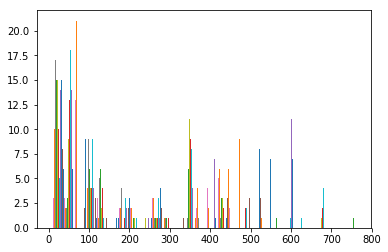

In [83]:
im_for = im_arr[:,:,10]
image_norm = (im_for - im_for.min())/(im_for.max() - im_for.min())



plt.hist(im_for)

In [86]:
im = sitk.ReadImage('C://Image Processing/ProstateX/resampled/t2_tse_tra_ProstateX_0021.nii')

im_arr = sitk.GetArrayFromImage(im)

norm_im = exposure.equalize_hist(im_arr)

myshow(im_arr,10)
myshow(norm_im,10)



plt.hist(norm_im[:,:,10])

AttributeError: 'Image' object has no attribute 'shape'

In [ ]:
oq = sitk.JoinSeries([sitk.VectorIndexSelectionCast(mv,i) for i in range(mv.GetNumberOfComponentsPerPixel())])

sitk.WriteImage(oq, sys.argv[2], True)

imgs = []
for f in files:
    imgs.append(sitk.ReadImage(directory+f,sitk.sitkUInt8))

img1 = sitk.JoinSeries(imgs)



all_images.append(sitk.JoinSeries(generated_images))

In [110]:
#function for patch extraction 
def extract_patches_to_sequence(data,  directory, folder, size=[32,32,0]):
    data.loc[:,'patches']=''
    extract=sitk.ExtractImageFilter()
    patches=[]
    for i in range(len(data)): 
        for image in directory:
            if data.loc[i,'match']==image:
                
                #Reading image, getting array frm image, normalization and than getting image from array for further processing
                
                im = sitk.ReadImage(folder+image)  
                im_arr=sitk.GetArrayFromImage(im)
                norm_arr=exposure.equalize_hist(im_arr)
                im_norm=sitk.GetImageFromArray(norm_arr)
                
                #patch extraction
                try:
                    extract.SetSize(size)
                    coordinate=list(data.loc[i,'coordinates'])
                    extract.SetIndex(coordinate)
                    extracted=extract.Execute(im)
                    print(str(data.loc[i,'match']),'\tsuccess!')
                    patches.append(sitk.JoinSeries(extracted)) #appending images to the list of arrays
                    
                except: 
                    if RuntimeError==True:
                        
                        print('Problem with Requsted region, reconsider {} index'.format(data.loc[i,'match']))
    
    
    
    return patches           

In [ ]:
t2_seq=extract_patches_to_sequence(t2_df, data_dir, folder)

t2_tse_tra_ProstateX_0000.nii.gz 	success!
t2_tse_tra_ProstateX_0001_s006.nii.gz 	success!
t2_tse_tra_ProstateX_0001_s010.nii.gz 	success!
t2_tse_tra_ProstateX_0002.nii.gz 	success!
t2_tse_tra_ProstateX_0002.nii.gz 	success!
t2_tse_tra_ProstateX_0003.nii.gz 	success!
t2_tse_tra_ProstateX_0003.nii.gz 	success!
t2_tse_tra_ProstateX_0004.nii.gz 	success!
t2_tse_tra_ProstateX_0005.nii.gz 	success!
t2_tse_tra_ProstateX_0005.nii.gz 	success!
t2_tse_tra_ProstateX_0005.nii.gz 	success!
t2_tse_tra_ProstateX_0006.nii.gz 	success!
t2_tse_tra_ProstateX_0006.nii.gz 	success!
t2_tse_tra_ProstateX_0007.nii.gz 	success!
t2_tse_tra_ProstateX_0008.nii.gz 	success!
t2_tse_tra_ProstateX_0009.nii.gz 	success!
t2_tse_tra_ProstateX_0010_s006.nii.gz 	success!
t2_tse_tra_ProstateX_0010_s004.nii.gz 	success!
t2_tse_tra_ProstateX_0011_s006.nii.gz 	success!
t2_tse_tra_ProstateX_0011_s004.nii.gz 	success!
t2_tse_tra_ProstateX_0012.nii.gz 	success!
t2_tse_tra_ProstateX_0012.nii.gz 	success!
t2_tse_tra_ProstateX_001

t2_tse_tra_ProstateX_0117.nii.gz 	success!
t2_tse_tra_ProstateX_0117.nii.gz 	success!
t2_tse_tra_ProstateX_0118.nii.gz 	success!
t2_tse_tra_ProstateX_0118.nii.gz 	success!
t2_tse_tra_ProstateX_0119.nii.gz 	success!
t2_tse_tra_ProstateX_0120.nii.gz 	success!
t2_tse_tra_ProstateX_0120.nii.gz 	success!
t2_tse_tra_ProstateX_0121.nii.gz 	success!
t2_tse_tra_ProstateX_0121.nii.gz 	success!


In [109]:

patch = sitk.WriteImage(t2_seq)
for i in range(len(t2_seq)):
    
    

AttributeError: 'ImageSeriesReader' object has no attribute 't2_seq'

In [ ]:
extract = sitk.ExtractImageFilter()
extract.SetSize([64,64,0])
extract.SetIndex([153-20, 166-32, 12])
extracted = extract.Execute(im)

extr_arr = sitk.GetArrayFromImage(extracted)
plt.imshow(extr_arr,cmap='gray')

In [ ]:
extract = sitk.ExtractImageFilter()
extract.SetSize([64,64,0])
extract.SetIndex([203-20, 168-32, 9])
extracted = extract.Execute(im)

extr_arr = sitk.GetArrayFromImage(extracted)
plt.imshow(extr_arr,cmap='gray')



In [ ]:
im = sitk.ReadImage('C://Image Processing/ProstateX/t2/t2_tse_tra_ProstateX_0002.nii')
im_arr = sitk.GetArrayFromImage(im)
im_sl_9 = im_arr[9,:,:]
im_sl_9 = sitk.GetImageFromArray(im_sl_9)

extract = sitk.ExtractImageFilter()
extract.SetSize([32,32])
extract.SetIndex([203-20, 168-32])
extracted_image = extract.Execute(im_sl_9)


extrcated_arr = sitk.GetArrayFromImage(extracted_image)

plt.imshow(extrcated_arr, cmap = 'gray')

In [ ]:
myshow(im_arr,9)

In [ ]:
pos = [-27.0102, 41.5467, -26.0469]
ijk = im.TransformPhysicalPointToIndex(pos)

print(ijk)

In [ ]:
im = sitk.ReadImage('C://Image Processing/ProstateX/resampled/ep2d_diff_tra_DYNDIST_ADC_ProstateX_0000.nii')
im_arr = sitk.GetArrayFromImage(im)

im_sl_8 = im_arr[9,:,:]
im_sl_8 = sitk.GetImageFromArray(im_sl_8)

extract = sitk.ExtractImageFilter()
extract.SetSize([36,36])
extract.SetIndex([36, 72 ])
extracted_image = extract.Execute(im_sl_8)


extrcated_arr = sitk.GetArrayFromImage(extracted_image)

plt.imshow(extrcated_arr, cmap = 'gray')

In [ ]:
myshow(im_arr,9)

In [ ]:
data_all.loc[data_all['ProxID']=='ProstateX-0002']